In [1]:
import numpy as np
import pandas as pd

In [2]:
comments = pd.read_csv('comments.csv')
author_info = pd.read_csv('author_info.csv')
video_list = pd.read_csv('video_list.csv')

In [3]:
comments.sample(5)

,c_id,author,author_id,like_count,publish_time,rating,reply_count,text,video_id
40721,UgyHOM7x-P7rCe_xt7B4AaABAg,EucalyptaYukari,UC9PldPiGuIpL625CErZSY0g,0,2019-06-12T13:53:39.000Z,none,0,This vid deserves more likes after 21 views,LTejJnrzGPM
25840,UgwmBPc_8YJLxoMmtbd4AaABAg,Pekeng TISOY,UCu0faVPrW6wb-3SJRdhiJHQ,0,2019-02-21T09:08:04.000Z,none,0,As a man we're not looks a woman to be our wif...,QHTnuI9IKBA
20783,UgyvlJ_oFggVMdESqXR4AaABAg,sessomaru kanagawa,UCuVUuS0qnbr7oHs23NKnKBg,8,2019-01-31T19:08:18.000Z,none,0,happy Chinese New Year,FWMIPukvdsQ
39237,Ugz7C2FvBuk8xzLsFcN4AaABAg,Yagnik Sadhu,UCO6C-NkWH14j4TZivgw67ag,1,2019-06-28T20:21:14.000Z,none,0,我的幸存女王我也爱你我爱你，我想念你亲爱的 @liziqi,LTejJnrzGPM
42340,Ugy1O6-GKI-3WKgTaJ94AaABAg,Chi chan,UCCI1XTu-wd8x3tlz3tmGelA,1,2019-06-10T06:02:50.000Z,none,0,Aaaand... She also knows Kung Fu.,LTejJnrzGPM


In [4]:
author_info.sample(5)

,author_id,author,comment_count,country,description,subscriber_count,video_count,view_count
33414,UCKWoP4JxAncfUiCwLqowXgg,الحياة مع صفاء la vie avec safae,0,NaN,قناة مفيدة فيها جميع المواضيع,59300,195,12717712
42022,UCmGZ_rRHHytu6S0eqFL7MCw,Solitario El Rojo,0,NaN,NaN,0,4,15
3239,UC4Wg4nXHCAoz18NEwutdCug,小困困,0,NaN,哎呀妈呀脑瓜疼，脑瓜疼(๑ó﹏ò๑),1,0,0
13946,UC_uFCLfBvaFQLMhM8oqFrDg,Gilbert Bustamante,0,NaN,NaN,2,0,0
50819,UCpfIMuicdsbi-uCyNmLTwqw,德德,0,NaN,NaN,6,68,14080


In [6]:
video_list.sample(5)

,v_id,publish_time,title,comment_count,dislike_count,like_count,view_count
46,x4BuEQ1CUks,2018-08-16T09:02:21.000Z,How to make a Chinese red-cooked lamb leg? 红烧...,7506,3397,118282,10015860
98,ls5McwZTEJA,2017-08-30T08:07:53.000Z,家里突然热闹了，做了一大盘“傣味手抓饭”，顺便把做法也给你们,2299,1789,85362,5753646
90,jkfjMBJJUSI,2017-10-10T08:00:55.000Z,能遮阳挡雨的秋千长啥样？用木头沙发床给你们做一个瞧瞧,6211,2252,128258,6738391
85,kOFaTjHijag,2017-10-28T10:57:15.000Z,Mapo Tofu 素食界的香饽饽——麻婆豆腐,5073,3206,118503,10219572
2,vcSGNu18AdA,2019-11-10T17:22:09.000Z,"Let me ask you, what would you eat on snowy da...",9909,3020,188053,5989150


## 1. 数据探索和清洗
### 1.1 commnts

In [9]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69970 entries, 0 to 69969
Data columns (total 9 columns):
c_id            69970 non-null object
author          69969 non-null object
author_id       69970 non-null object
like_count      69970 non-null int64
publish_time    69970 non-null object
rating          69970 non-null object
reply_count     69970 non-null int64
text            69970 non-null object
video_id        69970 non-null object
dtypes: int64(2), object(7)
memory usage: 4.8+ MB


In [10]:
comments['rating'].unique()

array(['none'], dtype=object)

In [11]:
comments.drop(columns='rating', inplace=True)

In [12]:
comments['publish_time'] = pd.to_datetime(comments['publish_time'])

In [13]:
comments.sample(5)

,c_id,author,author_id,like_count,publish_time,reply_count,text,video_id
8134,UgxYvhpoNdR7QSWOwt14AaABAg,al fa,UCl8El4T-Uh9tZR3gqe7cQgQ,0,2019-05-17 08:27:50+00:00,0,Wow wow wow wow wooooowwww soooooooo coooool...,FWMIPukvdsQ
40622,Ugz7z3cjpptuiEamKSp4AaABAg,akira tsubaki,UCVYnFaOutzE8Y8c_Ayi3AUg,0,2019-06-12 16:36:52+00:00,0,Your place looks so comfy and peaceful.,LTejJnrzGPM
46794,UgyLWqTDvFbrhh3RCF94AaABAg,Mohd Aamir Khan,UCMcKwAK54PamxHoH3RigUeA,0,2019-05-02 20:31:30+00:00,0,Lovely,LTejJnrzGPM
58782,UgyAmfCF_j52kKmsX4p4AaABAg,Forger Airsoft,UCnelODaLlUIaY9qmWK9Watg,0,2018-11-29 08:36:48+00:00,1,Le Petit Chaperon Rouge.. à plus d'abonné que ...,LTejJnrzGPM
49244,UgyUc-M8f5ye4mwRLpd4AaABAg,Aman Chauhan,UCPXLQiQDbXDd5wKwMP3LcjA,0,2019-04-04 17:05:36+00:00,0,I wish i cud get a chance to experience her be...,LTejJnrzGPM


### 1.2 author_info

In [14]:
author_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63768 entries, 0 to 63767
Data columns (total 8 columns):
author_id           63768 non-null object
author              63767 non-null object
comment_count       63768 non-null int64
country             4301 non-null object
description         13547 non-null object
subscriber_count    63768 non-null int64
video_count         63768 non-null int64
view_count          63768 non-null int64
dtypes: int64(4), object(4)
memory usage: 3.9+ MB


In [15]:
country = pd.read_csv('country.csv')

In [16]:
country.sample(5)

,area,code
47,Colombia,CO
165,Oman,OM
25,Bolivia,BO
27,Bosnia and Herz.,BA
80,Georgia,GE


In [17]:
author_info = author_info.merge(country, left_on='country', right_on='code')

In [18]:
# 发现country是np.nan的被merge成了Namibia，这点需要改一下
author_info.sample(5)

,author_id,author,comment_count,country,description,subscriber_count,video_count,view_count,area,code
10466,UCGmAaROiEgabvKk7upt3P2A,Hidayatus Shalehah,0,NaN,NaN,52,9,329,Namibia,NaN
2624,UCSIjY5xWg2qxW7k8iInbvYg,noona_kecil 22,0,NaN,NaN,1,11,60,Namibia,NaN
21519,UCE03UtL_q_C6gpAIBSzVkRQ,Pam Leg,0,NaN,NaN,0,0,0,Namibia,NaN
10233,UCtr42EuhfemnW8kO1eaIZOg,mohit tomar,0,NaN,NaN,1,0,0,Namibia,NaN
39923,UCixWvEiY_KZxRodOoHTVwrQ,mae ma hal shangiba,0,NaN,NaN,0,0,0,Namibia,NaN


In [19]:
author_info.loc[author_info['country'].isnull(), 'area'] = np.nan

In [20]:
author_info.sample(5)

,author_id,author,comment_count,country,description,subscriber_count,video_count,view_count,area,code
31391,UCpG54XqysauWVVR1hDZySCg,MOUMITA CHATTERJEE,0,NaN,NaN,0,0,0,NaN,NaN
47883,UCH5ydBWadHNVzgPZwqvwUMg,Armi Phone,0,NaN,NaN,0,0,0,NaN,NaN
52492,UCfyM9kfVS14pSI76LBNHAIg,VorticoseComb1,0,NaN,NaN,3,1,31,NaN,NaN
3494,UCYHSkkQKyr2Lf2oj1p8sSTQ,Manisha Kashyap,0,NaN,NaN,0,0,0,NaN,NaN
60182,UC7dxvlMcCCm-A4jSeOA9Kfg,Edward New,0,US,Dmooji弹幕君，让YouTube出现弹幕的插件\n\n主页：www.dmooji.com...,11,1,2702,United States,US


### 1.3 video_list

In [21]:
video_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
v_id             101 non-null object
publish_time     101 non-null object
title            101 non-null object
comment_count    101 non-null int64
dislike_count    101 non-null int64
like_count       101 non-null int64
view_count       101 non-null int64
dtypes: int64(4), object(3)
memory usage: 5.6+ KB


In [22]:
video_list['publish_time'] = pd.to_datetime(video_list['publish_time'])
video_list['publish_time_clean'] = video_list['publish_time'].astype(str).str.extract(r'(\d*-\d*-\d*)\s*')[0]

In [23]:
video_list = video_list.sort_values(by='publish_time')

In [24]:
video_list.head()

,v_id,publish_time,title,comment_count,dislike_count,like_count,view_count,publish_time_clean
100,8A0ylonIRzU,2017-08-24 10:44:24+00:00,用葡萄皮给自己做件衣服，是一种怎样的体验？,14916,4683,259885,10785324,2017-08-24
99,BvisneA-AXM,2017-08-28 02:59:33+00:00,Celebrate Chinese Valentine’s Day with Qiaosu（...,2170,1027,62192,3950131,2017-08-28
98,ls5McwZTEJA,2017-08-30 08:07:53+00:00,家里突然热闹了，做了一大盘“傣味手抓饭”，顺便把做法也给你们,2299,1789,85362,5753646,2017-08-30
97,wIW79ULErTg,2017-08-31 09:37:53+00:00,“火焰醉鱼”这一定是我近几年来吃过最好吃的鱼! 没有之一!,4954,2698,102689,8252289,2017-08-31
96,K92fPB3lKCc,2017-09-01 02:47:37+00:00,黄桃罐头：炎炎夏日，来罐冰镇黄桃罐头怎么样？,7101,5165,156014,17141823,2017-09-01


## 2. 问题：
1. 李子柒是谁？（在海外取得了怎样的成绩？各个视频的播放量如何？）
2. 李子柒在Youtube反响如何？
3. 喜欢李子柒的都是哪些国家的人？
4. 关注李子柒的人中，哪些是YouTube的大V？
5. 外国人都是为什么喜欢看李子柒的视频？
6. 李子柒是我国的文化输出吗？

### 2.1 李子柒是谁？

In [25]:
video_list[['comment_count', 'view_count']].sum()

comment_count       872248
view_count       976914736
dtype: int64

In [26]:
video_list['publish_time'].describe()

count                           101
unique                          101
top       2018-02-16 03:53:31+00:00
freq                              1
first     2017-08-24 10:44:24+00:00
last      2019-12-04 08:14:46+00:00
Name: publish_time, dtype: object

In [27]:
from pyecharts import Line


line = Line("李子柒各视频播放量", "2017年8月24日至2019年12月4日的101个视频 (单位: 万)", width=800)
line.add("", video_list['publish_time_clean'].values, np.round(video_list['view_count'].values/10000, 0), is_smooth=True, 
         legend_text_size=18,xaxis_label_textsize=14,yaxis_label_textsize=18,
         xaxis_rotate=20, yaxis_min=8, mark_point=['max'], mark_point_symbol='pin',
        mark_line=['average'])
line

ERROR:lml.utils:failed to import pyecharts_snapshot
Traceback (most recent call last):
  File "/root/anaconda3/lib/python3.7/site-packages/lml/utils.py", line 43, in do_import
    plugin_module = __import__(plugin_module_name)
ModuleNotFoundError: No module named 'pyecharts_snapshot'


### 2.2 李子柒在Youtube反响如何？

In [28]:
video_list[['dislike_count', 'like_count']].sum()

dislike_count      369971
like_count       16557252
dtype: int64

In [29]:
from pyecharts import Bar

bar = Bar("李子柒Youtube视频收获的'喜欢'/'不喜欢'数量", "所有101条视频总计", width=600)
bar.add("", ['喜欢', '不喜欢'], [16557252, 369971], is_stack=True, is_label_show=True,
       bar_category_gap='40%', label_color = ['#130f40'], label_text_size=18,
       legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
bar

In [30]:
369971/(369971+16557252)

0.021856567967468734

In [31]:
import emoji


def extract_emojis(str):
  return ''.join(c for c in str if c in emoji.UNICODE_EMOJI)

In [32]:
comments['emoji'] = comments['text'].apply(extract_emojis)

In [33]:
comments.sample(5)

,c_id,author,author_id,like_count,publish_time,reply_count,text,video_id,emoji
15898,UgxQMti6IDosL-DoE594AaABAg,Alhabib Chafiou,UCIp_RQrxlTrMXlp8lhmr6HA,0,2019-02-15 13:12:48+00:00,0,💖💖 🌷Macha'Allah elle es gentille aussi intelli...,FWMIPukvdsQ,💖💖🌷🌺
8799,UgzqoL2XCwwj4yeQmH54AaABAg,CaliD0LL,UC5RcV6QRo2kWpcA1KqW6E1w,0,2019-05-07 18:42:08+00:00,0,This is very nostalgic of my childhood. I’m al...,FWMIPukvdsQ,
13812,Ugz2_p2KYvCYG_FRXYN4AaABAg,ريحانة وبس,UCb6kx7kphr7c5sEyxeHJPng,1,2019-03-03 19:50:26+00:00,0,كل شئ رائع هنا حتى العمل ممتع حقاً ❤,FWMIPukvdsQ,❤
23770,UgzMzJeFsXRFLP0TjyV4AaABAg,Anna Steele,UCRCzcni_vxSRIZJNE7vWecg,5,2019-05-16 22:20:26+00:00,0,Thank you for introducing your grandmother 😉\n...,QHTnuI9IKBA,😉
69702,Ugxd-HzSVGaf_Xr43_N4AaABAg,Lynd XOXO,UCI-4fHBrzTOdLLVnXfuWV8Q,3,2018-09-25 06:05:03+00:00,0,This is me watching the video😲😲😲😲😲,LTejJnrzGPM,😲😲😲😲😲


In [34]:
emoji_all = []
for emj in list(comments['emoji'].values):
    if emj != '':
        emoji_all.extend(list(emj))

In [35]:
emoji_all[:10]

['🤗', '😎', '😘', '😘', '😉', '😂', '🤣', '😂', '🤣', '\U0001f90d']

In [36]:
emoji_counts = (pd.value_counts(emoji_all))

In [37]:
top10_emoji = emoji_counts.nlargest(16)
top10_emoji

😍    9506
👍    7316
❤    5077
👏    4158
😘    2953
🙏    2344
😊    1415
👌    1344
😂    1210
🤗    1001
💕     936
😭     906
💖     879
🏻     843
♥     789
🌹     625
dtype: int64

In [38]:
top10_emoji.index

Index(['😍', '👍', '❤', '👏', '😘', '🙏', '😊', '👌', '😂', '🤗', '💕', '😭', '💖', '🏻',
       '♥', '🌹'],
      dtype='object')

In [39]:
top10_emoji.values

array([9506, 7316, 5077, 4158, 2953, 2344, 1415, 1344, 1210, 1001,  936,
        906,  879,  843,  789,  625])

In [44]:
bar = Bar("李子柒Youtube评论中最经常出现的Emoji", "数据范围：3条点击量最高视频共69970条评论中出现的Emoji", width=630)
bar.add("", ['😍', '👍', '❤️', '👏', '😘', '🙏', '😊', '👌',
             '😂', '🤗', '💕', '😭', '💖', '♥', '🌹'], 
        [9506, 7316, 5077, 4158, 2953, 2344, 1415, 1344, 1210, 
         1001,  936,906,  879,  789,  625], 
        is_stack=True, is_label_show=False, 
       bar_category_gap='40%', label_color = ['#130f40'], label_text_size=18,
       legend_text_size=18,xaxis_label_textsize=18,yaxis_label_textsize=18)
bar

### 2.3 喜欢李子柒的都是哪些国家的人？

In [45]:
author_info.shape

(63768, 10)

In [46]:
author_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63768 entries, 0 to 63767
Data columns (total 10 columns):
author_id           63768 non-null object
author              63767 non-null object
comment_count       63768 non-null int64
country             4301 non-null object
description         13547 non-null object
subscriber_count    63768 non-null int64
video_count         63768 non-null int64
view_count          63768 non-null int64
area                4301 non-null object
code                4301 non-null object
dtypes: int64(4), object(6)
memory usage: 5.4+ MB


In [49]:
country_list = author_info['area'].value_counts()

In [50]:
country_list[:20]

United States     842
India             383
Vietnam           356
Indonesia         314
Russia            256
Brazil            204
United Kingdom    110
Korea             107
Philippines       104
Canada             99
Thailand           96
Germany            92
Taiwan             69
France             61
Japan              57
Pakistan           56
Australia          51
Ukraine            48
Turkey             47
Malaysia           43
Name: area, dtype: int64

In [51]:
len(country_list)

136

In [52]:
from pyecharts import Map


value = country_list.values
attr= country_list.index
map = Map("世界地图示例", width=1200, height=600)
map.add(
    "",
    attr,
    value,
    maptype="world",
    is_visualmap=True,
    visual_text_color="#000",
    visual_range=[0,900],
    visual_split_number=5,
    is_piecewise=True,
    pieces=[{'min': 800, 'max': 900, 'color': '#D84315'},
      {'min': 300, 'max': 400, 'color': '#FF5722'},
        {'min': 200, 'max': 300, 'color': '#FF7043'},
      {'min': 100, 'max': 200, 'color': '#FF8A65'},
      {'min': 50, 'max': 100, 'color': '#FFAB91'},
      {'min': 20, 'max': 50, 'color': '#FFCCBC'},
      {'min': 0, 'max': 20, 'color': '#FBE9E7'},
  ]
)
map

In [53]:
country_list[:20]

United States     842
India             383
Vietnam           356
Indonesia         314
Russia            256
Brazil            204
United Kingdom    110
Korea             107
Philippines       104
Canada             99
Thailand           96
Germany            92
Taiwan             69
France             61
Japan              57
Pakistan           56
Australia          51
Ukraine            48
Turkey             47
Malaysia           43
Name: area, dtype: int64

In [54]:
from langdetect import detect

In [55]:
def get_lang1(text):
    if text != '':
        try:
            return detect(text)
        except:
            return np.nan
    else:
        return np.nan

In [56]:
comments['lang1'] = comments['text'].apply(get_lang1)

In [57]:
comments[['text', 'lang1']].sample(5)

,text,lang1
63520,Its touch to my heart 🙏,en
1180,👋💖✨🥰🌿🌿🌿,NaN
23762,Estos vídeos me generan paz y muchas ganas de ...,es
27775,Hay,so
19115,大家新年快乐 Happy new year,en


In [58]:
import langid

In [59]:
def get_lang2(text):
    if text != "":
        try:
            return langid.classify(text)[0]
        except:
            return np.nan
    else:
        return np.nan

In [60]:
comments['lang2'] = comments['text'].apply(get_lang2)

In [61]:
# 综合看下来，还是langid的效果好一些
comments[['text', 'lang1', 'lang2']].sample(5)

,text,lang1,lang2
50338,Wow thats impressife,en,en
2314,💝💝💝💝💝,NaN,km
22341,好想去住下，世外桃源,zh-cn,zh
48985,Вы большая Молодец!!!,ru,ru
44891,坐2天就散架了,ko,zh


In [62]:
comments['lang2'].value_counts()[:10]

en    37475
zh     7611
vi     3028
ru     2736
es     2093
ja     1647
pt     1385
ar     1361
ko      993
th      882
Name: lang2, dtype: int64

In [63]:
comments['lang2'].value_counts()[:10]/69970*100

en    53.558668
zh    10.877519
vi     4.327569
ru     3.910247
es     2.991282
ja     2.353866
pt     1.979420
ar     1.945119
ko     1.419180
th     1.260540
Name: lang2, dtype: float64

In [64]:
len(comments['lang2'].unique())

96

### 2.4 关注李子柒的人中，哪些是YouTube的大V？

In [65]:
author_info.sort_values(by='subscriber_count', ascending=False)[:10]

,author_id,author,comment_count,country,description,subscriber_count,video_count,view_count,area,code
59670,UCb3ABHjhsFH-jBwODVN76wA,belajar menggambar,0,ID,"DRAWING is FUN and EASY, this chanel is about ...",1670000,1019,267290777,Indonesia,ID
14681,UCCiBMTQv7I99hgIzV4RLZpA,Chad Zuber,0,NaN,Survival! Adventure!... Finding simplicity i...,1230000,172,126767282,NaN,NaN
60218,UCOP-E07fFnd1AyqtCifZI3A,Primitive Unique Tool,0,US,Hello all fan and visitor welcome to my channe...,1170000,50,97425252,United States,US
61593,UCqow9MwWxJyKZfWbZ-JFI7Q,Manorama Music Songs,0,IN,This YouTube channel belongs to Manorama Music...,1060000,1425,524966294,India,IN
61571,UCd_SyDWOzXQd53C6efvFycw,Life is Awesome Civil Engineering Plans,0,IN,For business enquires and sponsership you can...,820000,1585,101851806,India,IN
63246,UChxkFSjTE7nLCHsDk8_pRhg,Justine Leconte officiel,0,DE,Hi there! \n\nI am a French fashion & jewelry ...,730000,230,64926789,Germany,DE
62383,UCIGEtjevANE0Nqain3EqNSg,TysyTube Restoration,0,FR,Welcome to TysyTube Restoration\nI’m 28 years ...,616000,84,63175463,France,FR
60908,UCpFj6OUz5l3cy8Y1N54-47Q,Primitive Evolution,0,US,Primitive Evolution is a channel related to th...,584000,84,86975403,United States,US
60587,UCIfT6SDOfHsFJqWQ7LPg_vQ,Primitive Jungle Lifeskills,0,US,Hi Everyone! I create this Channel in order to...,511000,40,122261958,United States,US
63484,UCiRjE6oSbfyF-gdGCrElCrg,عالم الزراعة Agriculture World,0,EG,قناه عالم الزراعه :تهتم بكل ما يخص الزراعه وطر...,474000,332,46890304,Egypt,EG


In [66]:
subscriber = pd.cut(author_info['subscriber_count'], [0, 100, 1000, 10000, 100000, 1000000, 10000000], 
       labels=['0-100人', '100-1000人', '1千-1万人', '1万-10万人','10万-100万人','100万-1000万人'], right=False)

In [67]:
subscriber.value_counts()

0-100人         59981
100-1000人       2614
1千-1万人           875
1万-10万人          243
10万-100万人         51
100万-1000万人        4
Name: subscriber_count, dtype: int64

### 2.5 外国人都是为什么喜欢看李子柒的视频？

In [68]:
comments['text'].sample(5)

53689                                             good....
48248    First time a recommendation  gave me something...
61930                                       Maestra, ídola
8127     Simple things are the warmest things. She is a...
45713                                  This is mesmerizing
Name: text, dtype: object

In [72]:
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)

comments.sort_values(by='like_count', ascending=False)[20:40][['like_count', 'text']]

,like_count,text
43024,3518,Watching your videos makes me want to become a better person...
43378,3495,Girl oh my god you're a straight up renaissance woman
2369,3460,"You inspired me to clean my room today, sounds stupid but i've been depressed for 5 years now, lived in pure garbage land and today... I cleaned, threw away alot a shit and took a shower hahaha thank you!"
24193,3448,Nature+simplicity+hardwork+camera quality= incredible video
42906,3407,"She reminds me of a character from some Ghibli movie, disciplined and focused, living in a beautiful environment."
10243,3360,"This is heart warming, beautiful, genuinely good wholesome life - thanks for reminding us how wonderfully simple like is - and some good hard work puts everything into perspective. Love the edibles. Thanks for sharing"
8697,3245,I love how there’s just a puppy and two lambs following her. \n\nHonestly. Goals.
24263,3111,this channel brings me peace like ive never felt before. thank you for doing these videos. makes my concrete world consumed by empty people who only have sad faces. chemicals in foods and single file lines. feel less like im here ...and more like im a place that we all should be. a home with nature and family a place and life worth living
10086,3045,Am I the only one questioning who took these awesome footages of her doing this stuff?
52281,2918,"When society collapses, this lady and her family will be living the high life"


In [73]:
comments.sample(5)

,c_id,author,author_id,like_count,publish_time,reply_count,text,video_id,emoji,lang1,lang2
16891,Ugz98XChGeHReZjVpYR4AaABAg,박민정,UCVruTPpcpBnFMjITaBcRRzg,0,2019-02-11 14:35:26+00:00,0,너무 아름답네요,FWMIPukvdsQ,,ko,ko
52479,UgxxoyrE0hZlpNFNGYh4AaABAg,Riryan Priester,UCZMnvo4K1gz3fy_ft8izlaA,0,2019-03-03 14:41:15+00:00,0,Perfeito.,LTejJnrzGPM,,pt,cy
43321,Ugyf5MC3-o46tUBuUfd4AaABAg,kluv rulfov,UCp0P9cWmYyD_uNyZTz-RGPg,0,2019-06-02 20:07:29+00:00,0,забери меня к себе,LTejJnrzGPM,,uk,ru
44894,Ugz-rND9dDFPDOLvQuN4AaABAg,Hoàng Thị Hiền,UCXKetizvvUKX6p0UlfZ1iow,0,2019-05-17 11:50:28+00:00,0,có ai ở Việt Nam k,LTejJnrzGPM,,vi,vi
12738,UgxzrQyhbf8fwHi-NNZ4AaABAg,Naina Thapa,UCoK6nU9BKhNo-czWv1J-CkA,0,2019-03-19 15:09:54+00:00,0,Wow,FWMIPukvdsQ,,pl,en


In [74]:
# 根据英文词频制作词云图
# 1. 把英文评论选取出来
comment_en = comments.loc[comments['lang2'] == 'en', ['author', 'text']]

In [75]:
comment_en.sample(5)

,author,text
23138,Cận Nguyên,"As I know, China cannot use youtube. Why is this channel usable?"
34071,Yudiono Bona,"""Risban"" (Name in java)"
5227,pulayn camson,This reminds us our culture
7985,AxelSituation,"I want to live on this farm! I love the ovens, I love the trays, I love the abundance of fresh fruits and vegetables. I go to live there!"
59376,Internet Commander,OMG I want to married Her!!!!


In [76]:
# 2. 利用pandas series的str.lower方法，先把文本转换为小写
comment_en['text_lower'] = comment_en['text'].str.lower()

In [77]:
comment_en.sample(5)

,author,text,text_lower
64705,wermerson israel,MUITO BOM MEUS PARA BENS GAROTA,muito bom meus para bens garota
3167,Xnerdz,"Very good recommendation, Arin.","very good recommendation, arin."
7624,Mengstab G.michael,"John 20 (KJV) - ዮሃንስ\n31: But these are written, that ye might believe that Jesus is the Christ, the Son of God; and that believing ye might have life through his name.John 14 (KJV) - ዮሃንስ\n6: Jesus saith unto him, I am the way, the truth, and the life: no man cometh unto the Father, but by me.\n7: If ye had known me, ye should have known my Father also: and from henceforth ye know him, and have seen him.John 3 (KJV) - ዮሃንስ\n16: For God so loved the world, that he gave his only begotten Son, that whosoever believeth in him should not perish, but have everlasting life.\n17: For God sent not his Son into the world to condemn the world; but that the world through him might be saved.\n18: He that believeth on him is not condemned: but he that believeth not is condemned already, because he hath not believed in the name of the only begotten Son of God.\n19: And this is the condemnation, that light is come into the world, and men loved darkness rather than light, because their deeds were evil.Romans 10 (KJV) - ሮሜ\n8: But what saith it? The word is nigh thee, even in thy mouth, and in thy heart: that is, the word of faith, which we preach;\n9: That if thou shalt confess with thy mouth the Lord Jesus, and shalt believe in thine heart that God hath raised him from the dead, thou shalt be saved.\n10: For with the heart man believeth unto righteousness; and with the mouth confession is made unto salvation.","john 20 (kjv) - ዮሃንስ\n31: but these are written, that ye might believe that jesus is the christ, the son of god; and that believing ye might have life through his name.john 14 (kjv) - ዮሃንስ\n6: jesus saith unto him, i am the way, the truth, and the life: no man cometh unto the father, but by me.\n7: if ye had known me, ye should have known my father also: and from henceforth ye know him, and have seen him.john 3 (kjv) - ዮሃንስ\n16: for god so loved the world, that he gave his only begotten son, that whosoever believeth in him should not perish, but have everlasting life.\n17: for god sent not his son into the world to condemn the world; but that the world through him might be saved.\n18: he that believeth on him is not condemned: but he that believeth not is condemned already, because he hath not believed in the name of the only begotten son of god.\n19: and this is the condemnation, that light is come into the world, and men loved darkness rather than light, because their deeds were evil.romans 10 (kjv) - ሮሜ\n8: but what saith it? the word is nigh thee, even in thy mouth, and in thy heart: that is, the word of faith, which we preach;\n9: that if thou shalt confess with thy mouth the lord jesus, and shalt believe in thine heart that god hath raised him from the dead, thou shalt be saved.\n10: for with the heart man believeth unto righteousness; and with the mouth confession is made unto salvation."
32489,Guiseppe Tartini,I want to come learn from this woman,i want to come learn from this woman
912,Suchismita Bera,please write the recipe in english,please write the recipe in english


In [78]:
# 3. 合并文本
comment_text = ' '.join(list(comment_en['text_lower']))

In [79]:
# 4. 去符号
r =  "【.*?】+|\\《.*?》+|\\#.*?#+|[.!/_,$&%^*()<>+""'?@|:~{}#]+|[——！，。=？、：“”‘’￥……（）《》【】]"
for i in list(r):
    comment_text = comment_text.replace(i, ' ')

In [80]:
# 5. 创建停用词表
stop_words_en = []
with open('stop_words_en.txt', 'r') as f:
    stop_words_en = [i.strip() for i in f.readlines()]
    
stop_words_en = list(set(stop_words_en))
stop_words_en.append('')

In [81]:
# 6. 用wordcloud绘制一版词云图
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


(-0.5, 999.5, 999.5, -0.5)

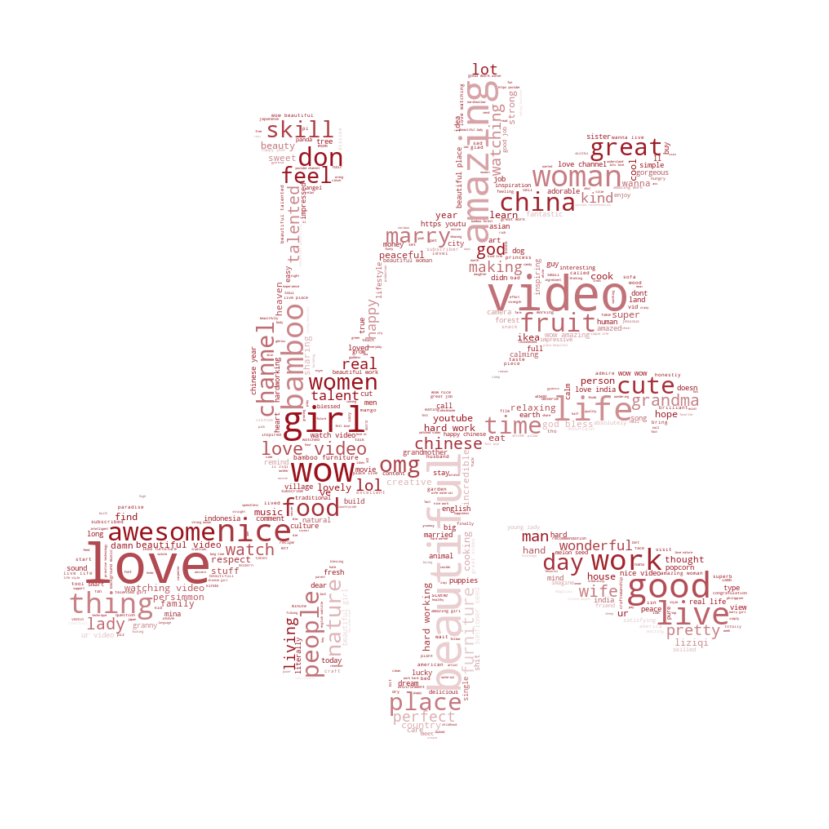

In [82]:
mask = np.array(Image.open("liziqi3.jpg"))
wordcloud = WordCloud(stopwords=stop_words_en, background_color="white", mode="RGBA", max_words=500, mask=mask).generate(comment_text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[15,15])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

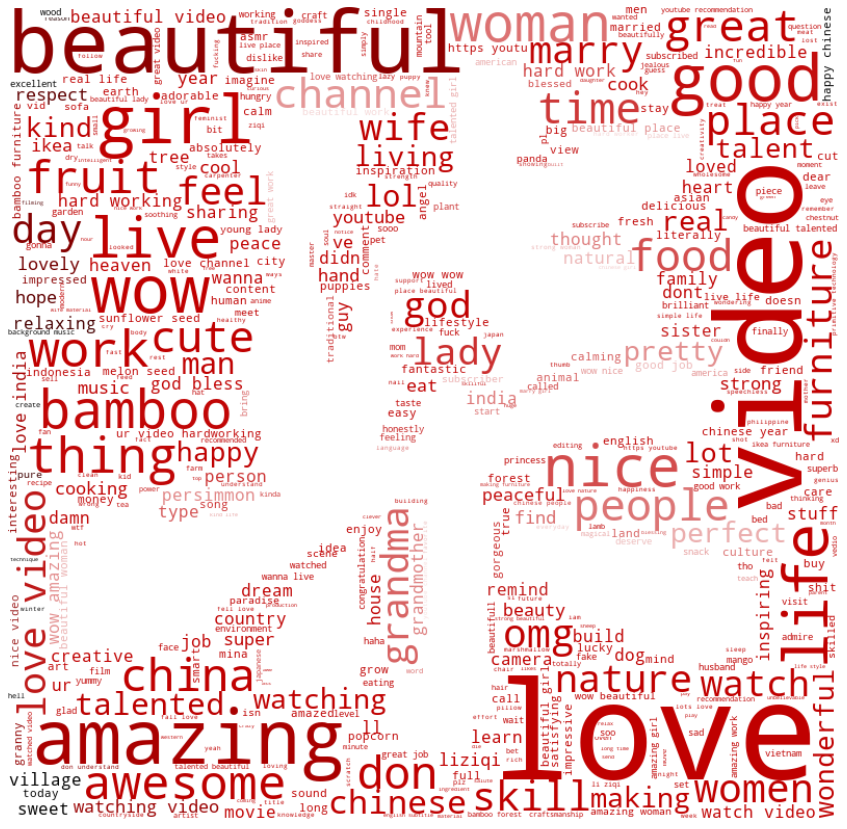

In [83]:
mask = np.array(Image.open("liziqi4.png"))
wordcloud = WordCloud(stopwords=stop_words_en, background_color="white", mode="RGBA", max_words=500, mask=mask).generate(comment_text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[15,15])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.savefig("liziqi_final.png", format="png")

In [84]:
# 7. 分词
comment_text = comment_text.split(' ')

In [85]:
comment_text[:20]

['a',
 'strange',
 'video',
 'teaching',
 'abnormal',
 'values',
 '',
 '',
 'too',
 'elegant',
 'to',
 'be',
 'realistic',
 '',
 'this',
 'is',
 'a',
 'staged',
 '',
 'life']

In [86]:
# 8. 去停用词
comment_text_list = [i for i in comment_text if i not in stop_words_en]

In [87]:
comment_text_list[:30]

['strange',
 'video',
 'teaching',
 'abnormal',
 'values',
 'elegant',
 'realistic',
 'staged',
 'life',
 'chinese',
 'don',
 't',
 'comment',
 'life',
 'peaceful',
 'real',
 'tradition',
 'omg',
 'cook',
 'lamb',
 'chinese',
 'lived',
 'village',
 'child',
 'didn',
 't',
 'exquisite',
 'life',
 'remember',
 'gardon']

In [88]:
# 10. 用pyecharts的WordCloud绘制词云图
from collections import Counter
from pyecharts import WordCloud

c = Counter()
c = Counter(comment_text_list)
wc_data = pd.DataFrame({'word':list(c.keys()), 'counts':list(c.values())}).sort_values(by='counts', ascending=False).head(100)

wordcloud = WordCloud(width=1000, height=600)
wordcloud.add("", wc_data['word'], wc_data['counts'], word_size_range=[20, 100])

In [89]:
wc_data.head(20)

,word,counts
45,love,4686
104,beautiful,3680
1,video,2990
101,amazing,2343
11,t,2196
98,wow,2041
8,life,1891
65,girl,1867
46,videos,1852
39,woman,1539


### 2.6 李子柒是我国的文化输出吗？

In [90]:
for word in ['china', 'China', 'chinese', 'Chinese', 'Japan', 'japan', 'Japanese', 'Japanese']:
    print(comments['text'].str.contains(word).sum())

271
501
271
719
132
52
77
20


In [91]:
comments['text'].str.contains('china|China|chinese|Chinese').sum()

1672

In [110]:
comment_en['text_lower'] = comment_en['text_lower'].astype(str)

In [117]:
comment_china = ' '.join(list(comment_en.loc[comment_en['text_lower'].str.contains('china|chinese'), 'text_lower'].values))

In [118]:
for i in list(r):
    comment_china = comment_china.replace(i, ' ')
    
comment_china = comment_china.split(' ')
comment_china_list = [i for i in comment_china if i not in stop_words_en]

In [121]:
c = Counter()
c = Counter(comment_china_list)
wc_data = pd.DataFrame({'word':list(c.keys()), 'counts':list(c.values())}).sort_values(by='counts', ascending=False).head(60)

wordcloud = WordCloud(width=1000, height=600)
wordcloud.add("", wc_data['word'], wc_data['counts'], word_size_range=[20, 100])

In [92]:
comments['text'].str.contains('Japan|japan|Japanese|Japanese').sum()

182

In [158]:
comments.loc[comments['text'].str.contains('apan'), 'text'].sample(5)

49553    I was wondering if she is chinese or japanese, but in 5:43 you can hear a dog, so I am 100% shes japanese, otherwise that dog already would have been eaten.                                                                                                                                          
48701    IKEA, Japan edition                                                                                                                                                                                                                                                                                   
17884    Is this video from a chinese origin or a japanese ...                                                                                                                                                                                                                                                 
42398    I wish you could do this with Japanese knotweed but no it's way too flimsy and 

In [156]:
comments.iloc[45635]['text']

'I want to move to Japan. At first I wanted to go to a big city but now I’m thinking on moving to the countryside. Very beautiful and peaceful. If I wood move to a big city I think I’d get stressed because I’m living in a small village in Finland  right now! LOVED THE VIDEO❤️🙏🏻'

In [154]:
comments.loc[comments['text'].str.contains('China'), 'text'].sample(5)

1614     Her hometown, Sichuan, China's countryside                                                                                                                                                                                                                                              
32637    I saw many ignorant comments saying she’s Japanese or people don’t believe this is China as in their mind China’s the most polluted place on earth. Li Ziqi is showing people what western media doesn’t show people. Don’t be brainwashed and go to China and validate things yourself.
17587    I'm not from China but this made it feel like a home. Thank you for such a wonderful video. It is wonderful from every aspect. :)                                                                                                                                                       
51520    No sé cómo rayos llegué aquí pero está hermoso lo que hizo ésta bella mujer China.  Me suscribo.                         

In [139]:
comments.iloc[11406]['text']

'First tym I saw china’s people eating healthy & looking good food :)'

In [514]:
comments.iloc[42294]['text']

'Not sure if these videos are "real" or just part of the chinese propaganda machine...I\'d like to belive that they are real but on the other hand china controlls everything that goes up to the Internet in their country. So this would work nice as a way to portrai china in the best way possible.'

In [159]:
comments.iloc[49553]['text']

'I was wondering if she is chinese or japanese, but in 5:43 you can hear a dog, so I am 100% shes japanese, otherwise that dog already would have been eaten.'

In [521]:
comments.loc[comments['text'].str.contains('love china'), 'text'].sample(5)

8550     mashallah tthe best video i've ever seen i love china villages                                                                                                  
17133    Woww i love china  . Can you write tge recipes?                                                                                                                 
9030     I like this very much am from india and i love china and chinese culture very much its wonderful  and i like also chinese dish and method of cooking beautiful😊☺
31912    Wow china is such an amazing country, I love china!🇨🇳❤️                                                                                                         
39132    I love china                                                                                                                                                    
Name: text, dtype: object

In [534]:
comments.loc[comments['text'].str.contains('culture'), 'text'].sample(5)

41077    Oh No!!\nI see another independent Asian women that's going to be taken away by western male and have her changed her nationality T.T\nCan't Asian men appreciate independent women like her instead looking down on them, they aren't the evil white feminist that are driving the whites to near extinction (RIP)\nOh right, the always culture and religion exucuse\nWe need more independent and briliant women like her  in Asia. Preserve them T.T
38586    In Indian culture bamboo furniture are strictly prohibited , as it is used in only 'last journey' after death !                                                                                                                                                                                                                                                                                                                                         
25183    You are awesome! You are an ambassador for the Chinese culture and people! Does president X